In [20]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sympy import divisors

In [2]:
#load data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [3]:
print('train_x has the shape of:', train_x.shape)
print('train_y has the shape of:', train_y.shape)
print('test_x has the shape of:', test_x.shape)
print('test_y has the shape of:', test_y.shape)

train_x has the shape of: (60000, 28, 28)
train_y has the shape of: (60000,)
test_x has the shape of: (10000, 28, 28)
test_y has the shape of: (10000,)


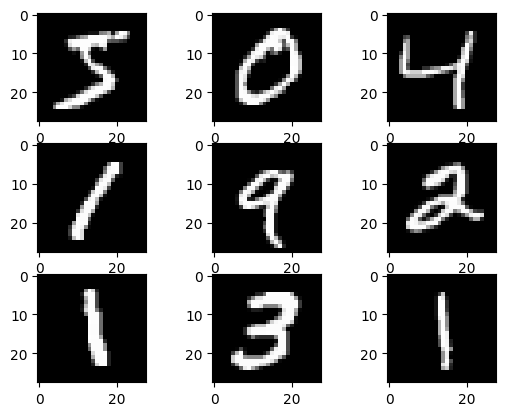

In [4]:
#plot the first 9 images
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))

In [5]:
#normalize pixel values
train_x_norm = train_x/255
test_x_norm = test_x/255

In [6]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(), #flatten the 28x28 pixel image
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
    tf.keras.layers.Dense(units=64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.0005)),
    tf.keras.layers.Dense(units=10, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
#create a validation set and test the learning model against it
history = model.fit(x = train_x_norm, y = train_y, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4358 - accuracy: 0.9269 - val_loss: 0.3068 - val_accuracy: 0.9583
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2688 - accuracy: 0.9639 - val_loss: 0.2568 - val_accuracy: 0.9630
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2264 - accuracy: 0.9690 - val_loss: 0.2309 - val_accuracy: 0.9643
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2031 - accuracy: 0.9726 - val_loss: 0.2093 - val_accuracy: 0.9698
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1846 - accuracy: 0.9743 - val_loss: 0.2050 - val_accuracy: 0.9681
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1714 - accuracy: 0.9765 - val_loss: 0.1933 - val_accuracy: 0.9696
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1647 - accuracy: 0.9772 - val_loss: 0.1919 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


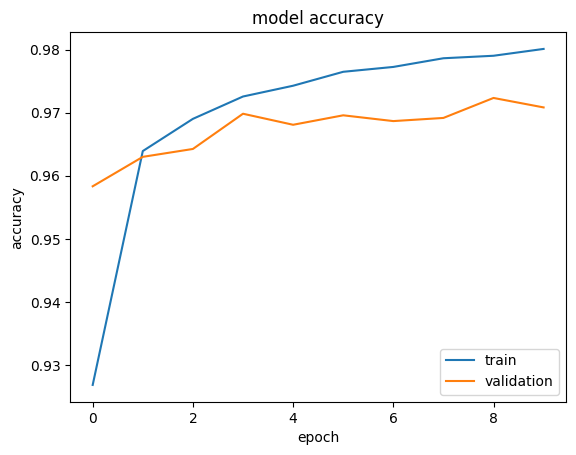

In [8]:
#check whether the model overfits
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [9]:
#infer values from test set
test_predict = model.predict(test_x_norm)
test_loss, test_acc = model.evaluate(test_x_norm, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9711


In [10]:
#convert one hot encoded classes to their predicted numbers
test_predict_idx = test_predict.argmax(axis = 1)
test_predict_idx[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [11]:
#compare the infered values with the ground truth values and create a list with indices of mislabeled data
comp_predict_test = test_predict_idx == test_y
false_values = [i for i, e in enumerate(comp_predict_test) if e == False]
len(false_values)

289

In [19]:
#model.save('models/neural_network')

INFO:tensorflow:Assets written to: models/neural_network\assets


INFO:tensorflow:Assets written to: models/neural_network\assets


[5 4 9 9 4 2 5 3 8 6 4 9 3 8 6 7 3 8 1 6 4 1 4 4 7 9 1 5 1 4 9 6 7 9 4 7 4
 6 6 0 3 2 7 9 4 9 7 4 5 5 5 8 9 6 3 7 8 4 9 9 6 4 3 6 2 3 8 7 5 0 4 7 2 8
 3 8 9 7 9 7 1 5 4 4 8 3 6 9 4 6 4 1 9 9 9 8 3 9 4 6 2 9 9 7 8 8 9 6 1 4 8
 7 3 5 9 3 6 9 8 6 9 9 8 1 5 3 8 6 8 4 4 6 7 3 4 9 6 8 4 3 5 8 9 9 8 8 5 5
 0 6 5 1 9 4 3 8 7 3 7 0 9 8 8 5 9 2 6 4 8 9 2 4 2 9 5 5 5 4 7 3 8 6 4 6 8
 9 3 8 4 2 0 8 7 8 6 1 8 7 3 4 9 3 8 9 3 7 4 3 4 3 3 3 3 3 3 3 3 9 9 3 9 8
 6 9 0 8 0 8 8 4 6 9 8 6 0 9 6 8 3 4 3 1 3 1 9 2 4 6 7 0 8 8 1 7 4 8 4 7 7
 3 7 1 3 8 4 9 9 0 9 9 2 6 2 8 5 4 4 8 4 2 5 5 2 4 2 6 6 8 3]


(array([10., 14., 15., 38., 43., 21., 31., 25., 45., 47.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

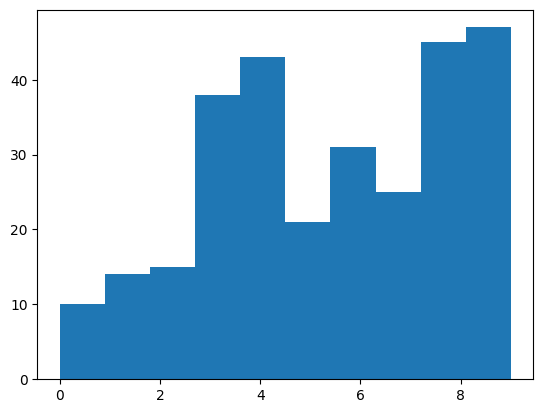

In [13]:
#print the ground truth values that got mislabeled
print(test_y[false_values])
plt.hist(test_y[false_values])

[6 9 8 7 2 7 3 7 2 0 7 3 5 2 8 3 7 2 8 4 9 7 9 9 2 8 3 9 2 9 7 5 1 5 6 8 0
 1 5 7 7 4 2 8 9 5 1 9 8 3 7 5 7 4 2 9 3 6 3 8 4 9 7 5 0 7 5 9 6 7 2 2 8 2
 5 3 4 2 3 2 8 3 8 9 1 8 4 2 9 1 9 2 0 7 1 2 2 1 9 5 4 7 0 1 7 5 0 1 8 7 5
 3 2 7 7 5 8 8 5 8 7 7 3 2 9 5 3 5 3 9 9 0 3 7 9 1 4 5 8 2 0 5 5 8 3 3 8 2
 6 0 6 2 3 2 5 2 3 5 1 2 3 5 2 1 0 7 4 9 2 7 8 8 7 7 3 3 6 9 2 2 7 5 9 0 3
 4 2 5 9 4 8 2 3 5 4 8 0 9 5 3 7 7 2 7 5 0 9 5 9 8 8 5 0 5 2 5 0 3 3 2 0 9
 2 7 7 7 6 5 7 8 4 7 7 5 7 7 5 7 7 8 2 8 2 8 8 8 3 4 2 2 6 0 8 3 9 6 9 2 2
 2 2 8 2 5 8 8 4 1 7 7 7 2 8 5 6 7 0 5 8 0 0 0 0 7 7 8 0 5 8]


(array([23., 13., 45., 29., 15., 38., 11., 47., 39., 29.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

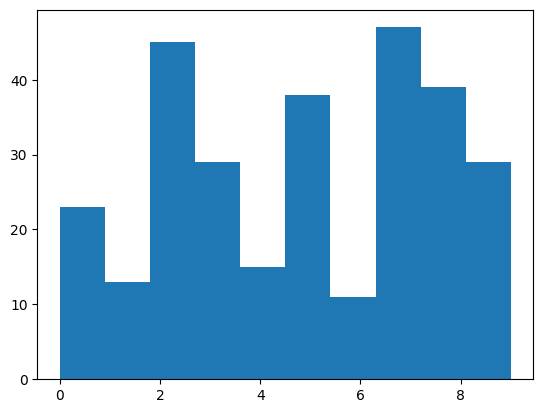

In [14]:
#print the mislabeled data
print(test_predict_idx[false_values])
plt.hist(test_predict_idx[false_values])


In [17]:
#calculate the divisor of the amount of false labeled images -> used in the next cell to plot all of them
divisor = divisors(len(false_values))
print(divisor)
div_max_20 = [i for i in divisor if i < 20]

[1, 17, 289]


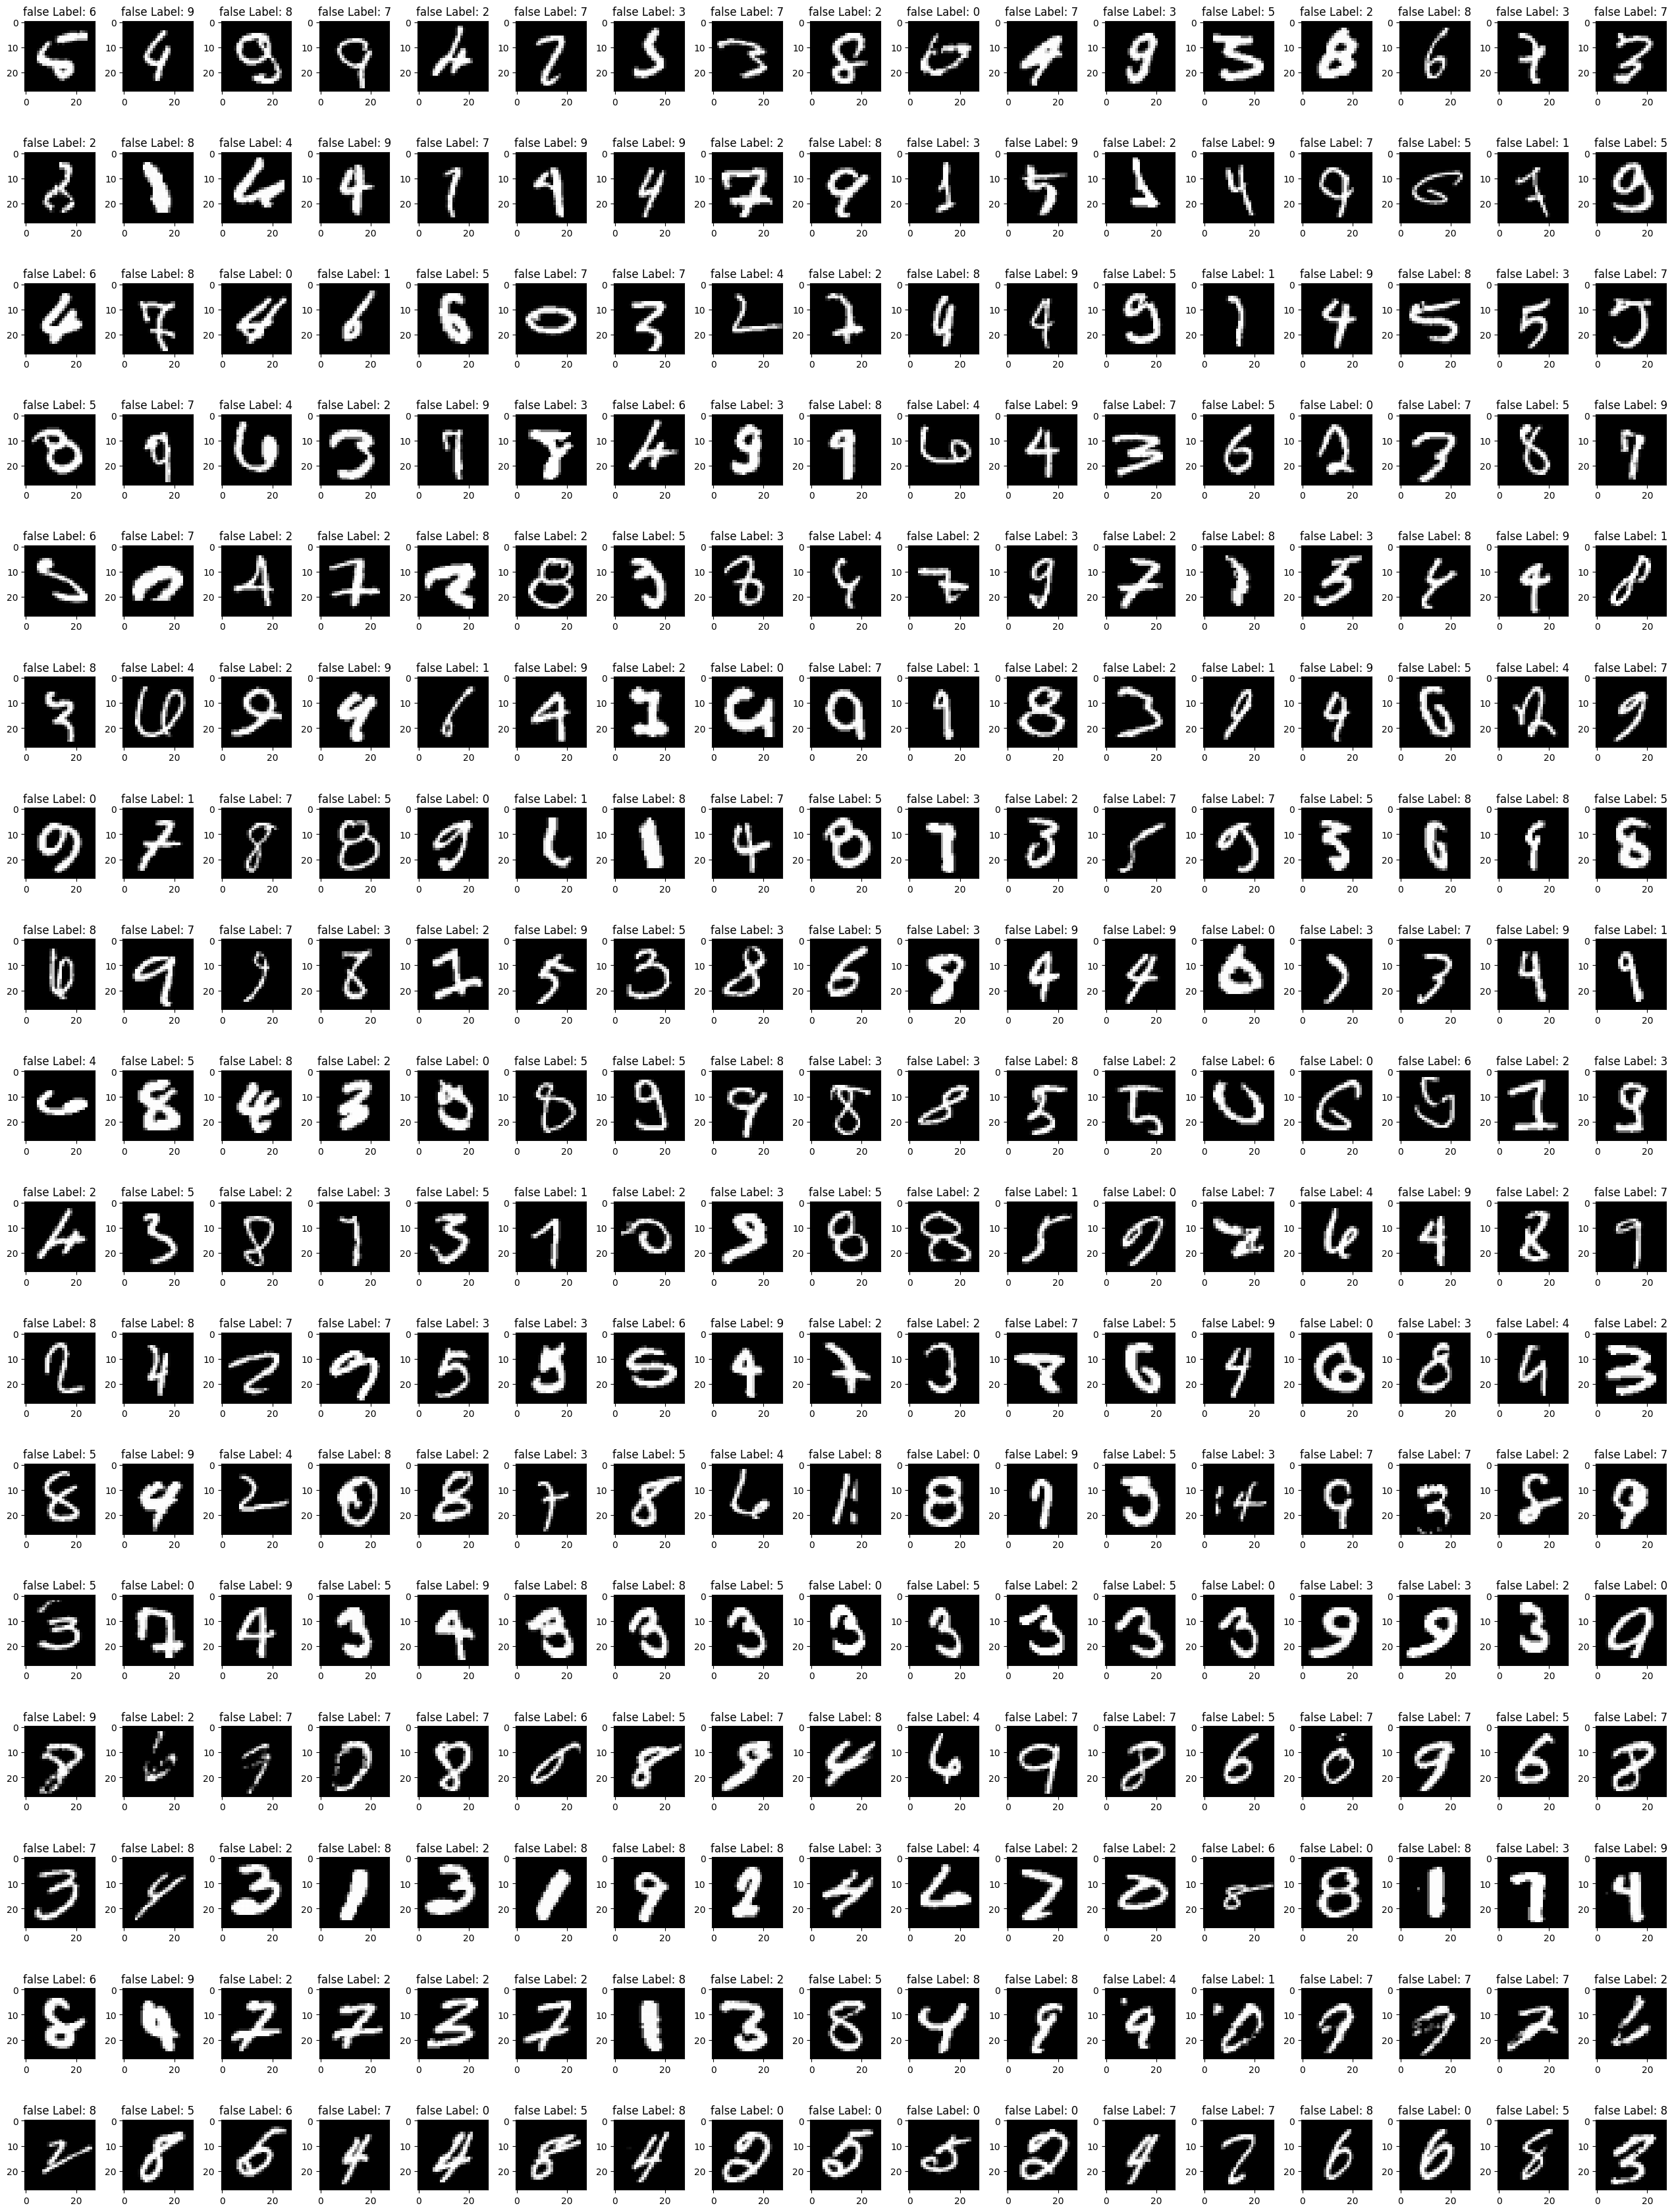

In [18]:
#calculate how many rows and columns are needed
num_col = div_max_20[len(div_max_20)-1] #use the divisor that is nearest to 20
num_row = len(false_values) // num_col
num = len(false_values)
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_x[false_values[i]], cmap='gray')
    ax.set_title('false Label: {}'.format(test_predict_idx[false_values[i]]))
plt.tight_layout()
plt.show()